# Earthquake denoising via Cluster Analysis of Trimmed Spectrogram (CATS)

This notebook explains the usage of the CATS detector.

A minimalistic example would look like this:

```python
data = import_sample_data()
denoiser = cats.CATSDenoiser(**parameters)
result = detector.denoise(data)
result.plot((1, 2))
```

Below is more detailed explanation. 

In [1]:
import numpy as np
import holoviews as hv

In [2]:
import cats

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<hr>

# Import of synthetic dataset

Basically, we may have any number of traces/receivers and components so that shape of the data can be arbitrary, including only one trace `(N,)`. 

But in this example, we will consider multiple 3-component receivers

**Note**, the API supports data format in `numpy.ndarray`.

In [3]:
data = cats.import_sample_data()

Dclean = data['data']
time = data['time']  # time
dt = data['dt']      # sampling time
x = data['x']        # location of recievers
dimensions = ["Component", "Receiver", "Time"]

In [4]:
print(f"Input dataset shape\t=\t{Dclean.shape}")
print(f"Dimensions correspond to\t{dimensions}")
print(*[f"{dim} : {shp}" for dim, shp in zip(dimensions, Dclean.shape)], sep='\t')

Input dataset shape	=	(3, 10, 70000)
Dimensions correspond to	['Component', 'Receiver', 'Time']
Component : 3	Receiver : 10	Time : 70000


In [5]:
# contamination with white gaussian noise
np.random.seed(132)
noise_scale = 0.1
Noise = np.random.randn(*Dclean.shape) * noise_scale   # colored noise
Noise += noise_scale * np.sin(time * 2 * np.pi * 50)[None, None, :]  # constant electric 50 Hz noise
D = Dclean + Noise

# CATS Denoiser

Detector is implemented as operator `cats.CATSDenoiser(parameters)`

Data parameters:

0. `dt_sec`                 - sampling time in **seconds**

Main free parameters:

1. `stft_window_type`       - type of STFT window like 'hann' or 'hamming'. See also `scipy.signal.get_window()` for more windows
1. `stft_window_sec`        - length of STFT window in **seconds**
2. `stft_overlap`           - overlap rate of STFT windows, range (0, 1) (e.g. `0.5` is 50%)
3. `minSNR`                 - minimum Signal-to-Noise Ratio, range ~ (3.5 - 5.5). It is used to estimate noise standard deviation and as minimum average SNR in clusters
4. `stationary_frame_sec`   - frame length where noise is stationary, in **seconds**
5. `cluster_size_t_sec`     - minimum cluster size in time or **minimum time duration** of strongest phases in signal, in **seconds**
6. `cluster_size_f_Hz`      - minimum cluster size in frequency (frequency width of signal), in **hertz**
7. `cluster_distance_t_sec`  - neighborhood distance for clustering in time or **minimum separation time** between different events, in **seconds**, default `cluster_size_t_sec/2`
8. `cluster_distance_f_Hz`   - neighborhood distance for clustering in frequency (minimum separation in frequency), in **hertz**, default `cluster_size_f_Hz/2`

Additional parameters:
1. `stft_nfft`               - zero-padding of STFT windows, recommended a power of 2 (e.g. `512`)
2. `clustering_multitrace`   - multitrace clustering, `True/False`, improves detection/denoising for regular arrays of receivers, default `False`
3. `cluster_size_trace`      - minimum number of traces for multitrace clustering, {1, 2, ...} (e.g. `2`)
4. `cluster_distance_trace`  - neighborhood distance for multitrace clustering, {1, 2, ...} (e.g. `2`)
5. `freq_bandpass_Hz`        - inclusive bandpass range in Hertz, e.g. [1, 256] Hz, which zeroes everythin outside of the range
6. `cluster catalogs`        - creates dataframes of cluster catalogs with their characteristics

Experimental parameters:
1. `bedate_freq_grouping_Hz`   - makes grouping of frequency bins for B-E-DATE noise estimation, except zero and Nyquist frequencies, given as group width in Hertz

2. `bedate_log_freq_grouping`  - makes grouping of frequency bins for B-E-DATE noise estimation in log10 scale, except zero and Nyquist frequencies, given as group width in log10 Hertz

3. `cluster_minSNR`            - min average cluster SNR, by default the same as `minSNR`  

4. `cluster_fullness`          - min number of elements in cluster, by default 0 (optional parameter)

5. `cluster_size_f_logHz`      - min cluster size in frequency in log10 scale, e.g. 0.5 log10 Hz 

6. `cluster_distance_f_logHz`  - clustering distance in frequency in log10 scale, increases computational cost

In [6]:
denoiser = cats.CATSDenoiser(dt_sec=dt,
                             stft_window_type='hann',
                             stft_window_sec=0.75, 
                             stft_overlap=0.8,
                             minSNR=6.0,
                             stationary_frame_sec=-1,  # `-1` means the least possible
                             cluster_size_t_sec=0.2,
                             cluster_size_f_Hz=5,
                             cluster_size_f_logHz=0.5,
                             cluster_distance_t_sec=0.2,
                             cluster_distance_f_Hz=2, 
                             cluster_minSNR=0.0)

The instantiated `denoiser` has four main methods:
1. `.denoise` - performs the detection of events
2. `.denoise_to_file` - performs the detection and saves to a file
3. `.denoise_on_files` - performs the detection by reading from fiels and saving to files
4. `.STFT` - link to the corresponding STFT operator, see more in `cats.STFTOperator(...)` 

As well, all the input paramaters such as `stationary_frame_sec`, `cluster_size_t_sec`, `cluster_size_f_Hz`, etc., are used to calculate indexed lengths `stationary_frame_len`, `cluster_size_t_len`, `cluster_size_f_len`, etc., according to the given samplings `dt_sec`, `stft_overlap`, and `stft_nfft`.

**Note**, other properties can viewed via `.dict()`

#### Noise PSD

:Curve   [Frequency]   (y)
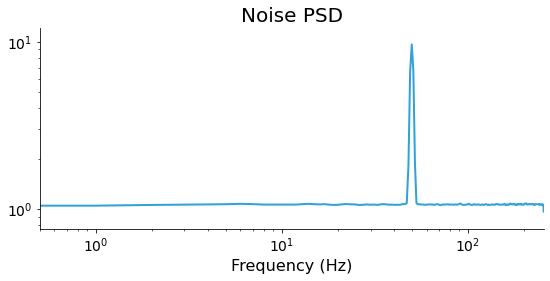

In [7]:
# visualize the Noise PSD using the corresponding STFT operator
noise_psd = abs(denoiser.STFT * Noise).mean(axis=(0, 1, 3))
f_dim = hv.Dimension('Frequency', unit='Hz')
fontsize = dict(labels=16, ticks=14, title=20)
fig_noise_psd = hv.Curve((denoiser.stft_frequency, noise_psd), 
                         kdims=f_dim).opts(fig_size=250, aspect=2.5, logx=True, 
                                           fontsize=fontsize, ylabel='', title='Noise PSD',
                                           logy=True, xlim=(0.5, np.nan))
fig_noise_psd

To save figure, we need to use `hv.save(...)`

In [8]:
hv.save(fig_noise_psd, "../figures/fig_noise_psd_sample.png", dpi=250)

## Applying CATS Denoiser

To apply the detection, we need to pass the input data `x` to the function `denoiser.denoise(x)`.

```python
denoiser.denoise(
                x,  # input data (numpy.ndarray), the last axis is time
                verbose,  # True/False, print status messages (stages and timing)
                full_info, # True/False/'qc', save intermediate steps for quality control
                )
```

`x` is `numpy.ndarray` and may have any number of dimensions with shape `(..., N)`, but the last axis `N` must be Time.

In [9]:
print(D.shape)

(3, 10, 70000)


In [10]:
result = denoiser.denoise(D, verbose=True, full_info=True)

1. STFT	...	Completed in 0.187 sec
2. B-E-DATE trimming	...	Completed in 0.0536 sec
3. Clustering	...	Completed in 0.0507 sec
4. Inverse STFT	...	Completed in 0.186 sec
Total elapsed time:	0.477 sec



The result of detection is written to `cats.CATSDenoisingResult` object for convenience of looking at the results on each step of the detection. 

It has several attributes:
1. `.signal`  -  original input signal `x`, shape `(..., N)`
2. `.coefficients`  -  result of STFT transform, complex-valued coefficients, shape `(..., Nf, Nt)`, where `Nf` number of frequencies, `Nt` number of time samples after STFT
3. `.spectrogram`  -  absolute value of complex-valued `.coefficients`, shape `(..., Nf, Nt)`
4. `.time_frames`  -  time frames of where noise is assumed to be stationary, shape `(nt, 2)`, `[[frame1_start, frame1_end], ...]`, where `nt` is number of stationary time frames
5. `frequency_groups`  -  frequency groups that were processed in B-E-DATE for noise estimation together, shape `(gNf, 2)`, where `gNf` number of frequency groups
5. `.noise_std`  -  noise standard deviation as a function of time and frequency, shape `(..., gNf, nt)`
6. `.noise_threshold_conversion`  -  converions constants from `noise_std` to actual thresholds `(gNf,)`
7. `.spectrogram_SNR_trimmed`  -  trimmed spectrogram of SNR values, shape `(..., Nf, Nt)`
8. `.spectrogram_SNR_clustered`  -  clustered trimmed SNR spectrogram, shape `(..., Nf, Nt)`
9. `.spectrogram_cluster_ID`  -  cluster indexes of `.spectrogram_SNR_clustered`, shape `(..., Nf, Nt)`
10. `.signal_denoised`  -  denoised input signal shape `(..., N)`
11. `.stft_frequency`  -  frequency axis of STFT `(Nf,)`
12. `.minSNR` - minimum Signal-to-Noise Ratio used in noise estimation
13. `.dt_sec` - sampling in seconds of the input `signal` 
14. `.stft_dt_sec` - sampling in seconds of the STFT operator
15. `.stft_t0_sec` - starting time of performed STFT, almost always `0` but rarely ~`-stft_dt_sec`
16. `.npts` - number of time points of the input `signal` -> `N`
17. `.stft_npts` - number of time points after the STFT -> `Nt`
18. `.history` - recorded timing of each processing stage (in seconds)
19. `.time()` - function, giving original time axis in seconds `(N,)`
20. `.stft_time()`  -  function, giving time axis after STFT in seconds `(Nt,)`
21. `.main_params`  -  all the params that are needed to initialize the denoiser, `CATSDenoiser.from_result(CATSDenoisingResult)`

Additionally:
- `.save(filename)` - to save the result as MAT file
- `.load(filename)` - to load a saved result from MAT file

To save the results with all the info we specified in `full_info` argument, use `save` method.

In [11]:
result.save("test_save.mat")

We can also import a saved result via `cats.CATSDetectionResult.load`

In [12]:
result = cats.CATSDenoisingResult.load("test_save.mat")

The previously saved result can also be used to reconstruct the used denoiser: 

In [13]:
denoiser = cats.CATSDenoiser.from_result(result)

Each attribute can be accessed as follows:

In [14]:
# in seconds
result.time_frames

array([[  0.        ,  45.4302054 ],
       [ 45.58063655,  91.01084195],
       [ 91.16127309, 136.74190964]])

### Clusters catalog
From the denoised events, we can retrieve a catalog of their cluster statistics. For that we could set `cats.CATSDenoiser(..., cluster_catalogs=True)` before, or we can update the denoiser by using 
```python 
denoiser.reset_params(cluster_catalogs=True)
```

After this, next time we apply the denoiser, the result will contain array of catalogs for each trace `.cluster_catalogs`

In [15]:
denoiser.reset_params(cluster_catalogs=True)

## Visualization

### Single trace and workflow steps

Another available option from `cats.CATSDenoisingResult` is method `.plot(ind)`. Which can display each step of the denoising workflow on a 1D trace indicated by argument `ind` which must be `tuple of ints`.

**Note**, to plot the workflow stages, `full_info` must be `'qc'` or `True` in `.denoise(..., full_info='qc')` (`'qc'` is equivalent to `.get_qc_keys()`)

**\*** `'qc'` will save only what is needed for quality control `.plot` function

In [16]:
# to see how `full_info` works
result = denoiser.denoise(D, verbose=True, 
                         full_info='qc'  # to save only necessary stages for quality control plotting
                        )

1. STFT	...	Completed in 0.184 sec
2. B-E-DATE trimming	...	Completed in 0.0541 sec
3. Clustering	...	Completed in 0.0505 sec
4. Inverse STFT	...	Completed in 0.117 sec
Total elapsed time:	0.405 sec



In [17]:
# Testing Save and load again
result.save("test_save.mat")
result = cats.CATSDenoisingResult.load("test_save.mat")

In [18]:
# retrieved statistics of clusters 
result.cluster_catalogs[0, 5]

Statistics,Time_start_sec,Time_end_sec,Time_center_of_mass_sec,Frequency_start_Hz,Frequency_end_Hz,Frequency_center_of_mass_Hz,Average_SNR,Peak_SNR,Area
Cluster_ID,,,,,,,,,
1,40.842056,41.142918,40.962422,0.000000,1.499596,0.589164,3.829833,4.718478,0.451172
2,50.018355,51.673098,50.997595,0.000000,11.496902,5.296938,10.138462,32.958866,10.677734
3,114.402885,114.703747,114.534163,0.000000,1.499596,0.276322,3.750758,4.193226,0.451172
4,122.827029,126.286945,123.674967,1.499596,9.497441,5.343257,7.496793,28.396891,12.632812
5,10.154102,11.207120,10.617339,3.499057,13.496364,7.694575,5.237129,11.792676,6.617188
6,17.224366,18.427815,17.732414,3.499057,24.493401,13.193826,4.912335,8.994674,14.287109


:Layout
   .Curve.A_0_full_stop_Input_data_colon_x_left_parenthesis_t_right_parenthesis                                                                                    :Curve   [Time]   (Amplitude)
   .Image.A_1_full_stop_Amplitude_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line                                     :Image   [Time,Frequency]   (z)
   .Image.A_2_full_stop_Trimmed_SNR_spectrogram_colon_T_left_parenthesis_t_comma_f_right_parenthesis                                                               :Image   [Time,Frequency]   (z)
   .Image.A_3_full_stop_Clustered_SNR_spectrogram_colon_reverse_over_mathcal_left_curly_bracket_L_right_curly_bracket_left_parenthesis_t_comma_f_right_parenthesis :Image   [Time,Frequency]   (z)
   .Curve.A_4_full_stop_Denoised_data_colon_ilde_left_curly_bracket_s_right_curly_bracket_left_parenthesis_t_right_parenthesis                                     :Curve   [Time]   (Amplitude)
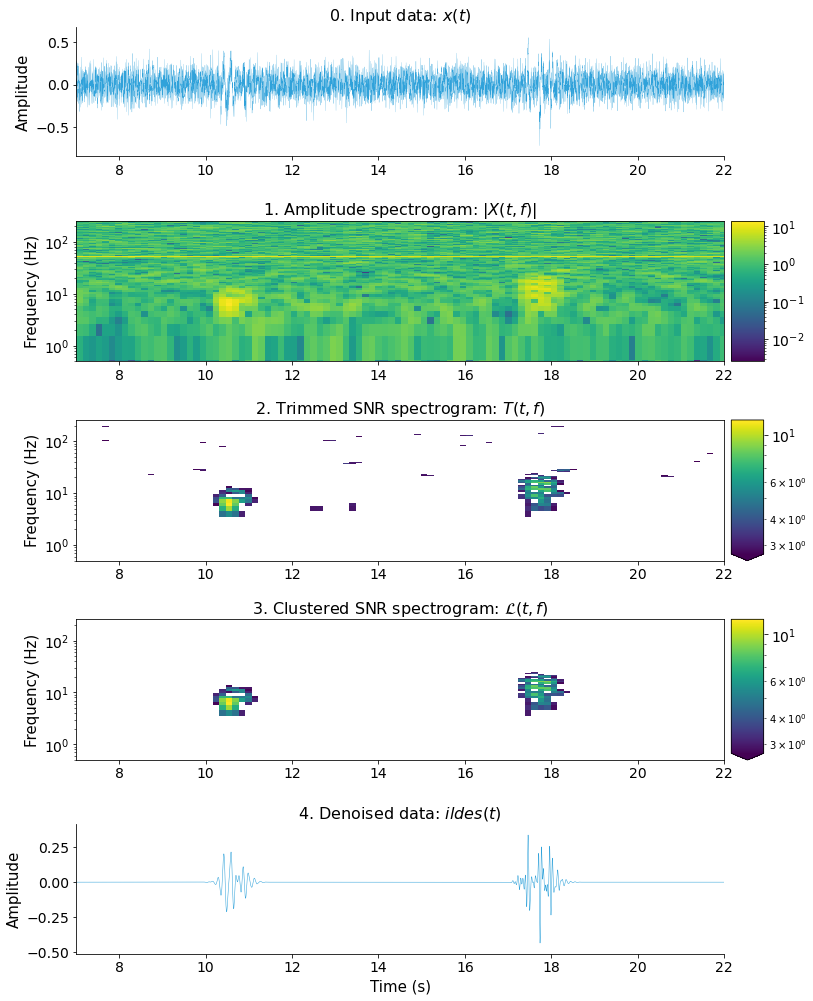

In [19]:
result.plot(ind=(0, 5), time_interval_sec=(7, 22))

### Visualization of the denoising result on multiple traces

:Overlay
   .Curve.I    :Curve   [Time]   (Trace)
   .Curve.II   :Curve   [Time]   (Trace)
   .Curve.III  :Curve   [Time]   (Trace)
   .Curve.IV   :Curve   [Time]   (Trace)
   .Curve.V    :Curve   [Time]   (Trace)
   .Curve.VI   :Curve   [Time]   (Trace)
   .Curve.VII  :Curve   [Time]   (Trace)
   .Curve.VIII :Curve   [Time]   (Trace)
   .Curve.IX   :Curve   [Time]   (Trace)
   .Curve.X    :Curve   [Time]   (Trace)
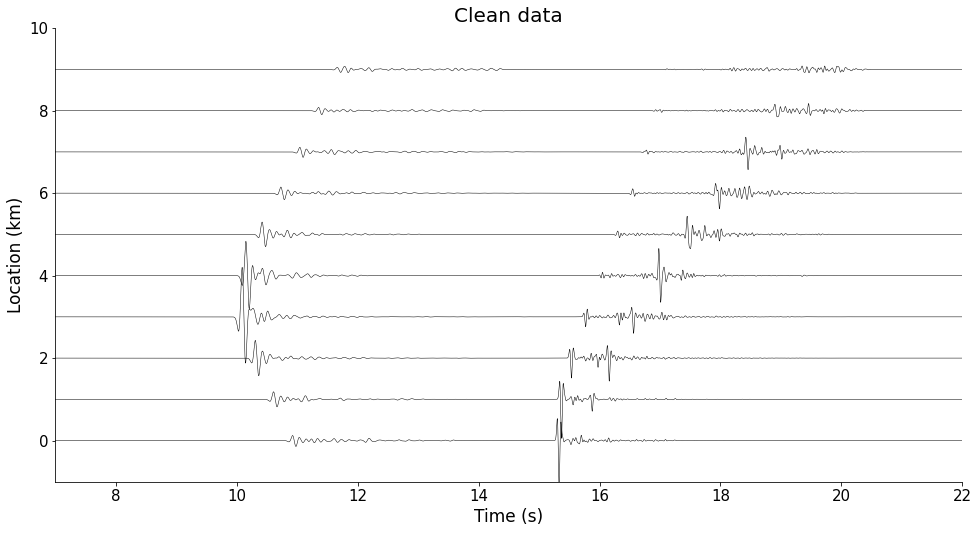

In [20]:
comp = 2

fig = cats.plot_traces(data=Dclean[comp], time=time, time_interval_sec=(7, 22), gain=0.5, each_trace=1)
fontsize = dict(labels=17, ticks=15, title=20); figsize = 450
fig = fig.opts(hv.opts.Curve(fontsize=fontsize), hv.opts.Rectangles(fontsize=fontsize))
fig = fig.opts(aspect=2, fig_size=figsize,
               ylabel='Location (km)', xlabel='Time (s)', title='Clean data')
# hv.save(fig, "../figures/clean_traces_sample.png", dpi=250)  # use this to save figure
fig

:Overlay
   .Curve.I    :Curve   [Time]   (Trace)
   .Curve.II   :Curve   [Time]   (Trace)
   .Curve.III  :Curve   [Time]   (Trace)
   .Curve.IV   :Curve   [Time]   (Trace)
   .Curve.V    :Curve   [Time]   (Trace)
   .Curve.VI   :Curve   [Time]   (Trace)
   .Curve.VII  :Curve   [Time]   (Trace)
   .Curve.VIII :Curve   [Time]   (Trace)
   .Curve.IX   :Curve   [Time]   (Trace)
   .Curve.X    :Curve   [Time]   (Trace)
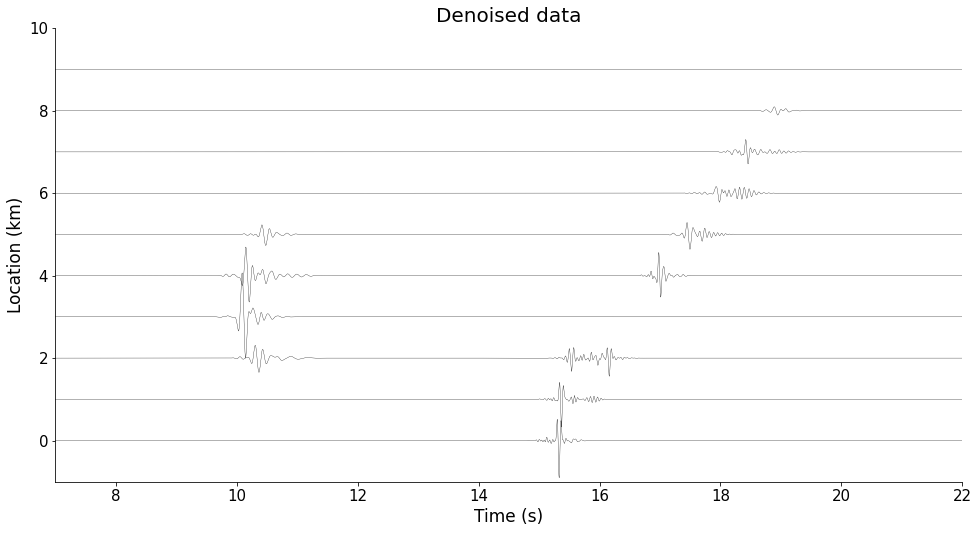

In [21]:
# for plotting traces with the results, we could also use the built-in `plot_traces` method of the `result` object
fig = result.plot_traces(ind=comp, show_denoised=True, time_interval_sec=(7, 22), gain=0.4)

fig = fig.opts(hv.opts.Curve(fontsize=fontsize, linewidth=0.3), hv.opts.Rectangles(fontsize=fontsize))
fig = fig.opts(aspect=2, fig_size=figsize,
               ylabel='Location (km)', xlabel='Time (s)', title='Denoised data')
fig

<hr>

# Extra example - multitrace denoising

Sometimes, the data are given on a "regular" array of receivers and earthquakes on the array represent coherent signal. This coherence across multiple stations can be used to enhance the denoising quality. Specifically, we can do clustering of spectrograms across multiple stations simultaneously `Trace x Time x Frequency`.

Here we show the multitrace denoising on the same dataset to showcase the improvement of the performance.

In [22]:
denoiser_mt = cats.CATSDenoiser(dt_sec=dt,
                                stft_window_type='hann',
                                stft_window_sec=0.75, 
                                stft_overlap=0.8,
                                minSNR=6.5,
                                stationary_frame_sec=-1,  # `-1` means the least possible
                                cluster_size_t_sec=0.2,
                                cluster_size_f_Hz=5,
                                cluster_size_f_logHz=0.35,
                                cluster_distance_t_sec=0.2,
                                cluster_distance_f_Hz=2,
                                clustering_multitrace=True,  # now we set multitrace clustering as `True`
                                cluster_size_trace=1,
                                cluster_distance_trace=1, 
                                cluster_catalogs=True, 
                                cluster_minSNR=3.5
                               )

Note, the `multitrace` clustering will be performed across the dimension of the input array which goes before the Time axis.

In [23]:
print(f"Input shape : {D.shape}")
print(f"Multitrace clustering will be done on {len(D.shape) - 2} axis with {D.shape[-2]} elements")
print(f"If we swapped axes of input data to {D.swapaxes(0, 1).shape}, \
then clustering would be done on {D.swapaxes(0, 1).shape[-2]} elements")

Input shape : (3, 10, 70000)
Multitrace clustering will be done on 1 axis with 10 elements
If we swapped axes of input data to (10, 3, 70000), then clustering would be done on 3 elements


In [24]:
result_mt = denoiser_mt.denoise(D, verbose=True, full_info='qc')

1. STFT	...	Completed in 0.204 sec
2. B-E-DATE trimming	...	Completed in 0.0511 sec
3. Clustering	...	Completed in 0.0543 sec
4. Inverse STFT	...	Completed in 0.115 sec
Total elapsed time:	0.424 sec



:Overlay
   .Curve.I    :Curve   [Time]   (Trace)
   .Curve.II   :Curve   [Time]   (Trace)
   .Curve.III  :Curve   [Time]   (Trace)
   .Curve.IV   :Curve   [Time]   (Trace)
   .Curve.V    :Curve   [Time]   (Trace)
   .Curve.VI   :Curve   [Time]   (Trace)
   .Curve.VII  :Curve   [Time]   (Trace)
   .Curve.VIII :Curve   [Time]   (Trace)
   .Curve.IX   :Curve   [Time]   (Trace)
   .Curve.X    :Curve   [Time]   (Trace)
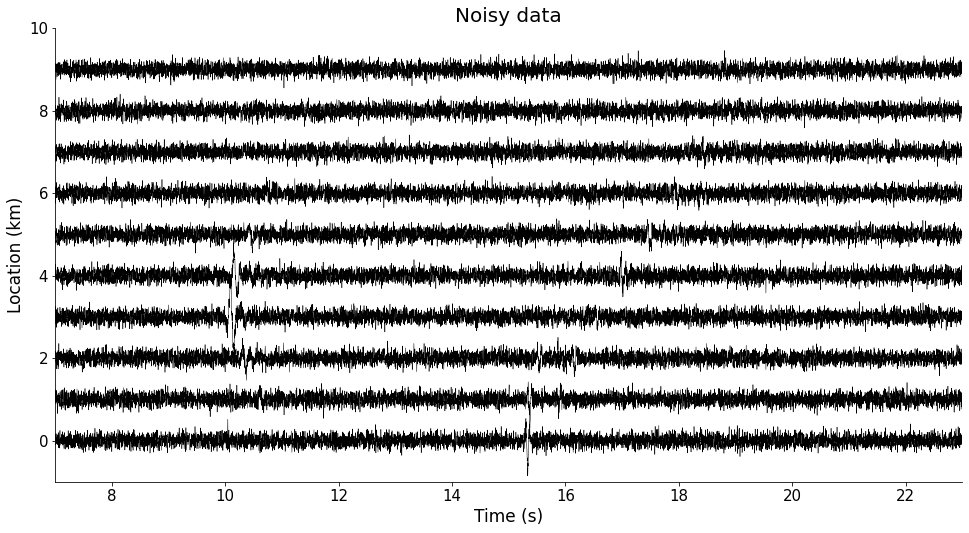

In [28]:
comp = 2
interval = (7, 23)

fig = cats.plot_traces(data=D[comp], time=time, time_interval_sec=interval, gain=0.5, each_trace=1)
fontsize = dict(labels=17, ticks=15, title=20); figsize = 450
fig = fig.opts(hv.opts.Curve(fontsize=fontsize), hv.opts.Rectangles(fontsize=fontsize))
fig = fig.opts(aspect=2, fig_size=figsize,
               ylabel='Location (km)', xlabel='Time (s)', title='Noisy data')
# hv.save(fig, "../figures/clean_traces_sample.png", dpi=250)  # use this to save figure
fig

:Overlay
   .Curve.I    :Curve   [Time]   (Trace)
   .Curve.II   :Curve   [Time]   (Trace)
   .Curve.III  :Curve   [Time]   (Trace)
   .Curve.IV   :Curve   [Time]   (Trace)
   .Curve.V    :Curve   [Time]   (Trace)
   .Curve.VI   :Curve   [Time]   (Trace)
   .Curve.VII  :Curve   [Time]   (Trace)
   .Curve.VIII :Curve   [Time]   (Trace)
   .Curve.IX   :Curve   [Time]   (Trace)
   .Curve.X    :Curve   [Time]   (Trace)
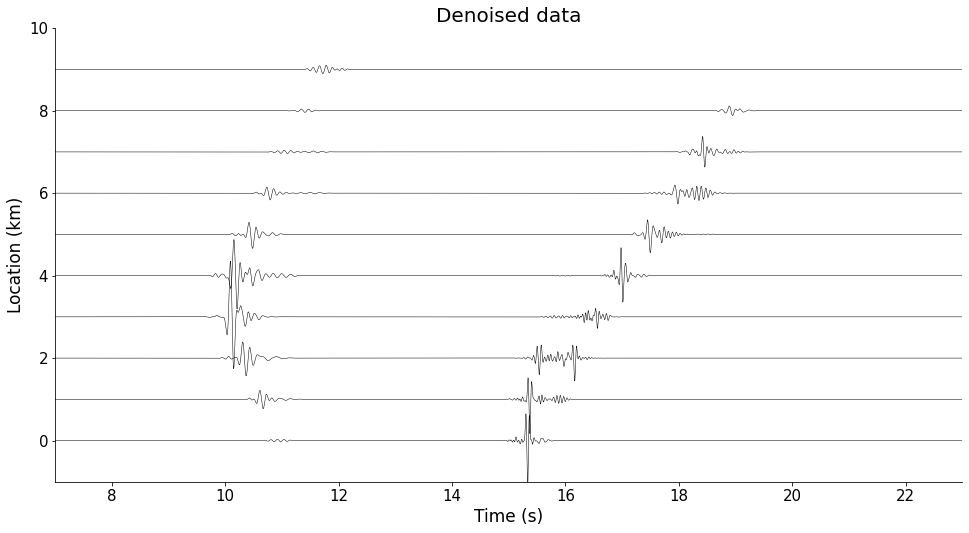

In [29]:
fig = result_mt.plot_traces(ind=comp, time_interval_sec=interval, gain=0.5, clip=False)

fig = fig.opts(hv.opts.Curve(fontsize=fontsize, linewidth=0.5), hv.opts.Rectangles(fontsize=fontsize))
fig = fig.opts(aspect=2, fig_size=figsize,
               ylabel='Location (km)', xlabel='Time (s)', title='Denoised data')
fig

:Overlay
   .Curve.I    :Curve   [Time]   (Trace)
   .Curve.II   :Curve   [Time]   (Trace)
   .Curve.III  :Curve   [Time]   (Trace)
   .Curve.IV   :Curve   [Time]   (Trace)
   .Curve.V    :Curve   [Time]   (Trace)
   .Curve.VI   :Curve   [Time]   (Trace)
   .Curve.VII  :Curve   [Time]   (Trace)
   .Curve.VIII :Curve   [Time]   (Trace)
   .Curve.IX   :Curve   [Time]   (Trace)
   .Curve.X    :Curve   [Time]   (Trace)
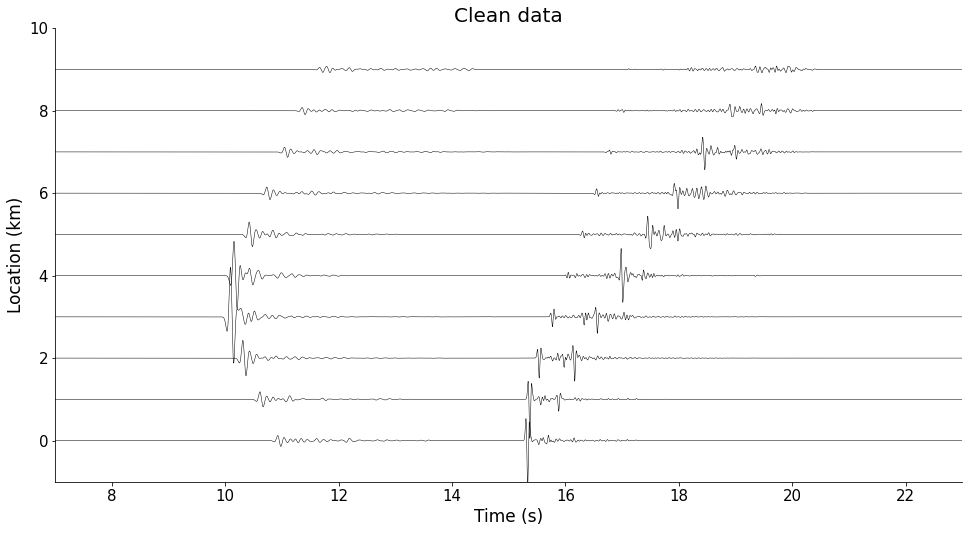

In [30]:
fig = cats.plot_traces(data=Dclean[comp], time=time, time_interval_sec=interval, gain=0.5, each_trace=1)
fontsize = dict(labels=17, ticks=15, title=20); figsize = 450
fig = fig.opts(hv.opts.Curve(fontsize=fontsize), hv.opts.Rectangles(fontsize=fontsize))
fig = fig.opts(aspect=2, fig_size=figsize,
               ylabel='Location (km)', xlabel='Time (s)', title='Clean data')
# hv.save(fig, "../figures/clean_traces_sample.png", dpi=250)  # use this to save figure
fig